<center>

# Football Analytics

Neste notebook iremos explorar dados gratuitos disponibilizados pelo StatsBomb.  

## IMPORTANDO AS BIBLIOTECAS NECESSÁRIAS

In [3]:
# Importando Bibliotecas necessárias
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import to_rgba
from urllib.request import urlopen
from mplsoccer import Sbopen, Pitch, FontManager, VerticalPitch, add_image
from PIL import Image
from statsbombpy import sb

In [4]:
# Ajustar as configurações de exibição do pandas
pd.set_option('display.max_columns', None)  # None permite mostrar todas as colunas

## EXTRAINDO AS COMPETIÇÕES E TEMPORADAS DISPONÍVEIS

In [5]:
competitions = sb.competitions()
competitions.head(3)

,competition_id,season_id,country_name,competition_name,competition_gender,competition_youth,competition_international,season_name,match_updated,match_updated_360,match_available_360,match_available
0,9,281,Germany,1. Bundesliga,male,False,False,2023/2024,2024-07-15T14:15:54.671676,2024-07-15T14:17:00.877356,2024-07-15T14:17:00.877356,2024-07-15T14:15:54.671676
1,9,27,Germany,1. Bundesliga,male,False,False,2015/2016,2024-05-19T11:11:14.192381,None,None,2024-05-19T11:11:14.192381
2,1267,107,Africa,African Cup of Nations,male,False,True,2023,2024-06-13T07:51:02.452825,None,None,2024-06-13T07:51:02.452825


In [6]:
# Criando uma lista com todas competições e seus respectivos ids, ordenadas de forma alfabética
competitions_list = competitions[['competition_name', 'competition_id']].drop_duplicates().reset_index(drop=True)

competitions_list

,competition_name,competition_id
0,1. Bundesliga,9
1,African Cup of Nations,1267
2,Champions League,16
3,Copa America,223
4,Copa del Rey,87
5,FA Women's Super League,37
6,FIFA U20 World Cup,1470
7,FIFA World Cup,43
8,Indian Super league,1238
9,La Liga,11


In [7]:
# Criando uma lista com todas as temporadas listadas da mais recente para a mais antiga
seasons_list = competitions[['season_name', 'season_id']].sort_values(by='season_name', ascending=False).drop_duplicates().reset_index(drop=True)

seasons_list

,season_name,season_id
0,2024,282
1,2023/2024,281
2,2023,107
3,2022/2023,235
4,2022,106
5,2021/2022,108
6,2020/2021,90
7,2020,43
8,2019/2020,42
9,2019,30


## SELECIONANDO COMPETIÇÃO E TEMPORADA

In [8]:
# Altere o id da competição e da temporada conforme desejar observando as listagens acima
campeonato = sb.matches(competition_id=43, season_id=106)
campeonato.head(3)

,match_id,match_date,kick_off,competition,season,home_team,away_team,home_score,away_score,match_status,match_status_360,last_updated,last_updated_360,match_week,competition_stage,stadium,referee,home_managers,away_managers,data_version,shot_fidelity_version,xy_fidelity_version
0,3857256,2022-12-02,21:00:00.000,International - FIFA World Cup,2022,Serbia,Switzerland,2,3,available,available,2023-02-17T23:45:15.306706,2023-04-26T23:49:58.956186,3,Group Stage,Stadium 974,Fernando Andrés Rapallini,Dragan Stojković,Murat Yakin,1.1.0,2,2
1,3869151,2022-12-03,21:00:00.000,International - FIFA World Cup,2022,Argentina,Australia,2,1,available,available,2023-07-30T07:46:05.382784,2023-07-30T07:48:51.865595,4,Round of 16,Ahmad bin Ali Stadium,Szymon Marciniak,Lionel Sebastián Scaloni,Graham James Arnold,1.1.0,2,2
2,3857257,2022-11-30,17:00:00.000,International - FIFA World Cup,2022,Australia,Denmark,1,0,available,available,2023-04-28T17:13:10.958725,2023-06-20T11:04:37.638969,3,Group Stage,Al Janoub Stadium,Mustapha Ghorbal,Graham James Arnold,Kasper Hjulmand,1.1.0,2,2


In [9]:
# checando a escrita exata de cada equipe
campeonato['home_team'].sort_values().unique()

array(['Argentina', 'Australia', 'Belgium', 'Brazil', 'Cameroon',
       'Canada', 'Costa Rica', 'Croatia', 'Denmark', 'Ecuador', 'England',
       'France', 'Germany', 'Ghana', 'Iran', 'Japan', 'Mexico', 'Morocco',
       'Netherlands', 'Poland', 'Portugal', 'Qatar', 'Saudi Arabia',
       'Senegal', 'Serbia', 'South Korea', 'Spain', 'Switzerland',
       'Tunisia', 'United States', 'Uruguay', 'Wales'], dtype=object)

## SELECIONANDO EQUIPE 

In [10]:
# Filtrando partidas de uma seleção específica (Selecione a equipe que desejar)

equipe = 'Brazil'
df_partidas = campeonato.loc[(campeonato['home_team'] == f'{equipe}')|(campeonato['away_team'] == f'{equipe}')]
df_partidas.head(3)

,match_id,match_date,kick_off,competition,season,home_team,away_team,home_score,away_score,match_status,match_status_360,last_updated,last_updated_360,match_week,competition_stage,stadium,referee,home_managers,away_managers,data_version,shot_fidelity_version,xy_fidelity_version
3,3857258,2022-11-24,21:00:00.000,International - FIFA World Cup,2022,Brazil,Serbia,2,0,available,available,2023-06-24T17:17:27.911026,2023-07-11T14:56:31.096588,1,Group Stage,Lusail Stadium,Alireza Faghani,Telê Santana da Silva,Dragan Stojković,1.1.0,2,2
14,3857269,2022-11-28,18:00:00.000,International - FIFA World Cup,2022,Brazil,Switzerland,1,0,available,available,2023-03-28T12:54:30.503171,2023-07-11T15:07:29.255525,2,Group Stage,Stadium 974,Ivan Arcides Barton Cisneros,Adenor Leonardo Bacchi,Murat Yakin,1.1.0,2,2
22,3869420,2022-12-09,17:00:00.000,International - FIFA World Cup,2022,Croatia,Brazil,1,1,available,available,2023-04-19T06:28:33.041249,2023-04-26T23:04:13.569501,5,Quarter-finals,Education City Stadium,Michael Oliver,Zlatko Dalić,Telê Santana da Silva,1.1.0,2,2


In [11]:
# Extarindo a lista de jogos da equipe selecionada
jogos_ids = df_partidas['match_id'].unique().tolist()
jogos_ids

[3857258, 3857269, 3869420, 3869253, 3857280]

In [12]:
# Inicializar o parser
parser = Sbopen()

# Listas para armazenar os dataframes
all_df = []
all_related = []
all_freeze = []
all_tactics = []

# Iterar sobre cada ID de jogo e coletar os dados
for jogo in jogos_ids:
    df, related, freeze, tactics = parser.event(jogo)
    
    # Adicionar os dataframes coletados às listas correspondentes
    all_df.append(df)
    all_related.append(related)
    all_freeze.append(freeze)
    all_tactics.append(tactics)

df_combined = pd.concat(all_df, ignore_index=True)
related_combined = pd.concat(all_related, ignore_index=True)
freeze_combined = pd.concat(all_freeze, ignore_index=True)
tactics_combined = pd.concat(all_tactics, ignore_index=True)

In [13]:
# df contendo todos os jogos da equipe selecionada
df_combined.sample(3)

,id,index,period,timestamp,minute,second,possession,duration,match_id,type_id,type_name,possession_team_id,possession_team_name,play_pattern_id,play_pattern_name,team_id,team_name,tactics_formation,player_id,player_name,position_id,position_name,pass_recipient_id,pass_recipient_name,pass_length,pass_angle,pass_height_id,pass_height_name,end_x,end_y,body_part_id,body_part_name,sub_type_id,sub_type_name,x,y,under_pressure,counterpress,outcome_id,outcome_name,out,pass_cross,pass_switch,off_camera,foul_committed_card_id,foul_committed_card_name,aerial_won,foul_committed_advantage,foul_won_advantage,foul_won_defensive,technique_id,technique_name,shot_one_on_one,shot_statsbomb_xg,end_z,goalkeeper_position_id,goalkeeper_position_name,injury_stoppage_in_chain,pass_assisted_shot_id,pass_shot_assist,shot_key_pass_id,dribble_nutmeg,ball_recovery_recovery_failure,dribble_overrun,ball_recovery_offensive,shot_first_time,block_offensive,substitution_replacement_id,substitution_replacement_name,bad_behaviour_card_id,bad_behaviour_card_name,pass_goal_assist,pass_cut_back,block_deflection,shot_deflected,dribble_no_touch,foul_committed_offensive,pass_miscommunication,pass_deflected,pass_no_touch,half_start_late_video_start,foul_committed_penalty,foul_won_penalty
18247,28dd2fa9-2f47-493d-8ae4-e9a1a18d2a0c,1613,1,00:45:50.377000,45,50,68,NaN,3857280,42,Ball Receipt,781,Brazil,3,From Free Kick,781,Brazil,None,3202.0,Gabriel Fernando de Jesus,23.0,Center Forward,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.5,29.8,NaN,NaN,9.0,Incomplete,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13477,a36d0480-8040-49c2-b8d4-b39712779065,890,1,00:23:19.562000,23,19,31,1.322785,3869253,30,Pass,781,Brazil,3,From Free Kick,781,Brazil,None,18395.0,Vinícius José Paixão de Oliveira Júnior,21.0,Left Wing,3063.0,Danilo Luiz da Silva,14.455794,2.795777,1.0,Ground Pass,97.8,8.3,40.0,Right Foot,NaN,NaN,111.4,3.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13169,5b876de3-9557-45cf-b6f3-c27b70147c6e,582,1,00:17:10.689000,17,10,25,NaN,3869253,42,Ball Receipt,781,Brazil,7,From Goal Kick,781,Brazil,None,4372.0,Marcos Aoás Corrêa,3.0,Right Center Back,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.0,50.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
# Extraindo os nomes completos dos jogadores da equipe selecionada anteriormente
df_jogadores = df_combined[df_combined['team_name'] == equipe]
nomes_jogadores = df_jogadores['player_name'].sort_values().unique()

nomes_jogadores

array(['Alex Nicolao Telles', 'Alex Sandro Lobo Silva',
       'Alisson Ramsés Becker', 'Antony Matheus dos Santos',
       'Bruno Guimarães Rodriguez Moura', 'Carlos Henrique Casimiro',
       'Daniel Alves da Silva', 'Danilo Luiz da Silva',
       'Ederson Santana de Moraes', 'Frederico Rodrigues Santos',
       'Fábio Henrique Tavares', 'Gabriel Fernando de Jesus',
       'Gabriel Teodoro Martinelli Silva',
       'Gleison Bremer Silva Nascimento',
       'Lucas Tolentino Coelho de Lima', 'Marcos Aoás Corrêa',
       'Neymar da Silva Santos Junior',
       'Pedro Guilherme Abreu dos Santos', 'Raphael Dias Belloli',
       'Richarlison de Andrade', 'Rodrygo Silva de Goes',
       'Thiago Emiliano da Silva',
       'Vinícius José Paixão de Oliveira Júnior',
       'Weverton Pereira da Silva', 'Éder Gabriel Militão',
       'Éverton Augusto de Barros Ribeiro', nan], dtype=object)

In [15]:
# Extraindo os nomes das ações que podem ser analisadas
df_combined['type_name'].sort_values().unique()

array(['50/50', 'Bad Behaviour', 'Ball Receipt', 'Ball Recovery', 'Block',
       'Carry', 'Clearance', 'Dispossessed', 'Dribble', 'Dribbled Past',
       'Duel', 'Error', 'Foul Committed', 'Foul Won', 'Goal Keeper',
       'Half End', 'Half Start', 'Injury Stoppage', 'Interception',
       'Miscontrol', 'Offside', 'Pass', 'Player Off', 'Player On',
       'Pressure', 'Referee Ball-Drop', 'Shield', 'Shot', 'Starting XI',
       'Substitution', 'Tactical Shift'], dtype=object)

In [16]:
# Extraindo a fração para facilitar a visualização do id do jogo para seleção
df_partidas[df_partidas['match_id'].isin(jogos_ids)][['match_id', 'home_team', 'away_team']]

,match_id,home_team,away_team
3,3857258,Brazil,Serbia
14,3857269,Brazil,Switzerland
22,3869420,Croatia,Brazil
25,3869253,Brazil,South Korea
48,3857280,Cameroon,Brazil


In [17]:
# Criando função para geração dos gráficos de análise
def analise (jogo, jogador, metrica):
    df_filtered_jogo = df_combined[df_combined.match_id == jogo]
    df_filtered_jogador = df_filtered_jogo[df_filtered_jogo.player_name == jogador]
    pontos = df_filtered_jogador[df_filtered_jogador.type_name == metrica].copy()

    # Gerando o gráfico no campo de jogo
    pitch = Pitch(pitch_color='#aabb97', line_color='white',
              stripe_color='#c2d59d', stripe=True)

    fig, ax = pitch.draw(figsize=(8, 6))
    hull = pitch.convexhull(pontos.x, pontos.y)
    poly = pitch.polygon(hull, ax=ax, edgecolor='cornflowerblue', facecolor='cornflowerblue', alpha=0.3)
    scatter = pitch.scatter(pontos.x, pontos.y, ax=ax, edgecolor='black', facecolor='cornflowerblue')
    plt.show()


## Analisando

**Atenção:** Nem todos os parâmetros geram pontos para impressão no gráfico, utilize com :  

Ball Receipt, Ball Recovery, Block, Clearance, Dispossessed, Dribble, Dribbled Past, Duel, Error, Foul Committed, Foul Won, Interception, Miscontrol, Offside, Pass, Pressure, Shield e Shot

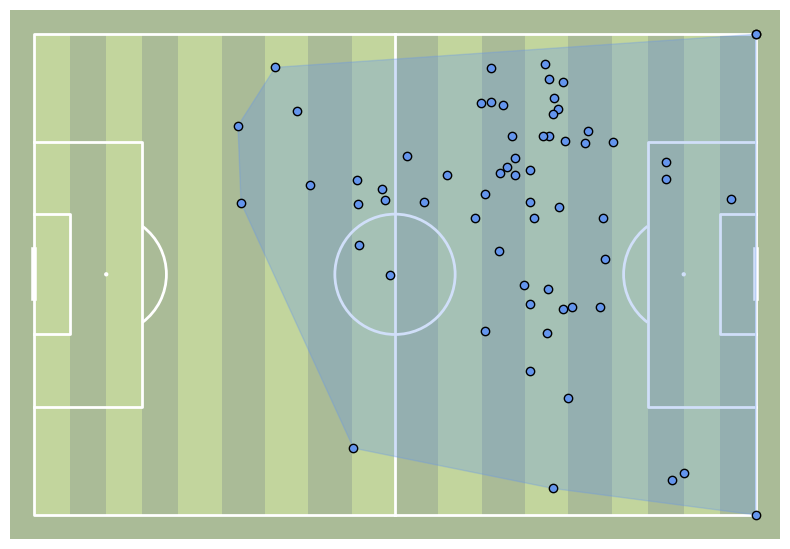

In [18]:
# Selecionando o jogo, o jogador e a métrica que desejamos analisar (substitua conforme necessidade, lembrando que as escritas devem ser idênticas)
analise(3869420, 'Neymar da Silva Santos Junior', 'Pass')

In [15]:
related_combined

,match_id,id,index,type_name,id_related,index_related,type_name_related
0,3857258,f9296299-3395-4a1b-9349-4d740e0eab95,3,Half Start,0c646c2e-85f5-4cee-b4cd-aa903ba752b2,4,Half Start
1,3857258,0c646c2e-85f5-4cee-b4cd-aa903ba752b2,4,Half Start,f9296299-3395-4a1b-9349-4d740e0eab95,3,Half Start
2,3857258,dd455069-07ce-4acb-a490-81118fcb0235,5,Pass,632321bc-ef74-4b84-8919-5b5b8ecafa05,6,Ball Receipt
3,3857258,632321bc-ef74-4b84-8919-5b5b8ecafa05,6,Ball Receipt,dd455069-07ce-4acb-a490-81118fcb0235,5,Pass
4,3857258,bd74159d-a009-4ffb-bf61-e5755adf3d5f,7,Carry,3ec348c7-e144-4c2a-8ad0-5c6e18199403,8,Pass
...,...,...,...,...,...,...,...
37369,3857280,dcfd1fe4-22dd-47fb-8e20-7710916e37b4,3276,Ball Receipt,92752f10-fc2b-454c-a0d4-1ea9238a68bd,3277,Carry
37370,3857280,7a142f63-4d57-4e1b-a161-a411fd4c289d,3293,Pass,3b379029-5ea2-48fc-89d4-a01ac604c15b,3292,Carry
37371,3857280,d79d1f3b-a40d-481a-b93a-7cba0a9c92f1,3291,Ball Receipt,3b379029-5ea2-48fc-89d4-a01ac604c15b,3292,Carry
37372,3857280,4464c4a3-e0f3-448a-a046-6fd431a41d40,3294,Ball Receipt,880873fd-b476-41dd-82d3-98f0a4e6fb0c,3295,Carry


In [121]:
freeze_combined.head()

,teammate,match_id,id,x,y,player_id,player_name,position_id,position_name,event_freeze_id
0,False,3857258,7e920dff-ac95-416c-afd5-aa517b812da3,111.0,42.1,6687,Saša Lukić,9,Right Defensive Midfield,1
1,False,3857258,7e920dff-ac95-416c-afd5-aa517b812da3,117.3,33.6,7993,Filip Mladenović,8,Left Wing Back,2
2,False,3857258,7e920dff-ac95-416c-afd5-aa517b812da3,114.6,34.8,5589,Sergej Milinković-Savić,20,Left Attacking Midfield,3
3,False,3857258,7e920dff-ac95-416c-afd5-aa517b812da3,118.0,36.3,4269,Aleksandar Mitrović,23,Center Forward,4
4,False,3857258,7e920dff-ac95-416c-afd5-aa517b812da3,115.4,43.3,6321,Milos Veljkovic,4,Center Back,5


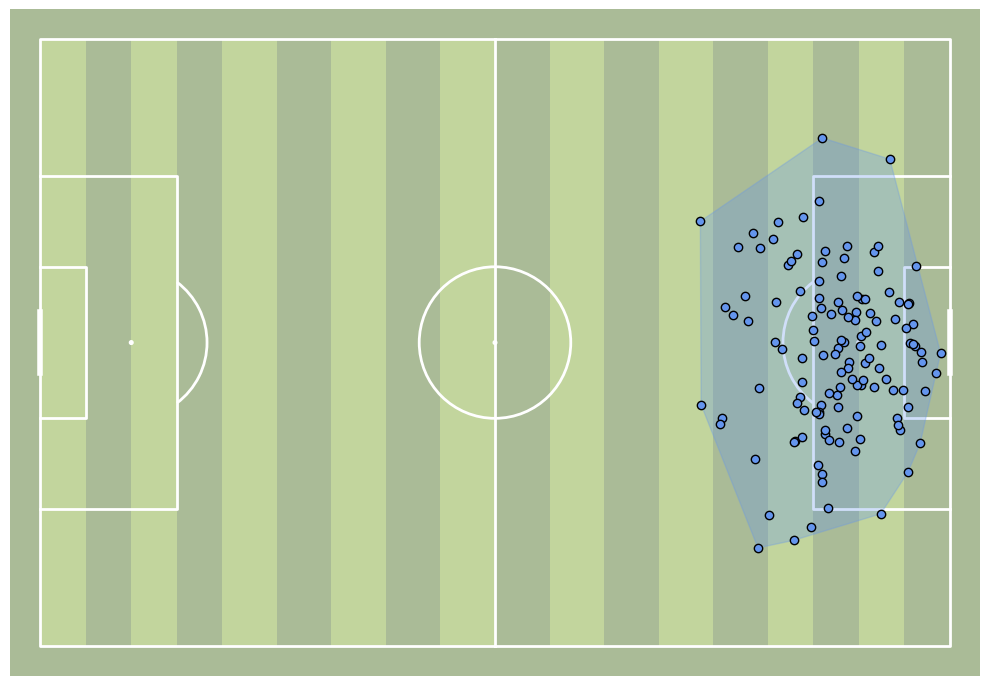

In [124]:
# Gerando o gráfico no campo de jogo
fui = freeze_combined[freeze_combined['event_freeze_id'] == 3]

pitch = Pitch(pitch_color='#aabb97', line_color='white',
              stripe_color='#c2d59d', stripe=True)

fig, ax = pitch.draw(figsize=(10, 7.5))
hull = pitch.convexhull(fui.x, fui.y)
poly = pitch.polygon(hull, ax=ax, edgecolor='cornflowerblue', facecolor='cornflowerblue', alpha=0.3)
scatter = pitch.scatter(fui.x, fui.y, ax=ax, edgecolor='black', facecolor='cornflowerblue')
plt.show()

In [120]:
tactics_combined

,jersey_number,match_id,id,player_id,player_name,position_id,position_name,event_tactics_id
0,1,3857258,d8786232-319f-4825-ac63-d84ae55b5417,5547,Alisson Ramsés Becker,1,Goalkeeper,1
1,2,3857258,d8786232-319f-4825-ac63-d84ae55b5417,3063,Danilo Luiz da Silva,2,Right Back,2
2,4,3857258,d8786232-319f-4825-ac63-d84ae55b5417,4372,Marcos Aoás Corrêa,3,Right Center Back,3
3,3,3857258,d8786232-319f-4825-ac63-d84ae55b5417,3295,Thiago Emiliano da Silva,5,Left Center Back,4
4,6,3857258,d8786232-319f-4825-ac63-d84ae55b5417,6945,Alex Sandro Lobo Silva,6,Left Back,5
...,...,...,...,...,...,...,...,...
270,8,3857280,bd3092b5-6413-4133-aea4-0457d3d365c6,3141,André-Frank Zambo Anguissa,11,Left Defensive Midfield,7
271,6,3857280,bd3092b5-6413-4133-aea4-0457d3d365c6,16015,Nicolas Moumi Ngamaleu,12,Right Midfield,8
272,12,3857280,bd3092b5-6413-4133-aea4-0457d3d365c6,3551,Karl Brillant Toko Ekambi,16,Left Midfield,9
273,10,3857280,bd3092b5-6413-4133-aea4-0457d3d365c6,11174,Vincent Paté Aboubakar,22,Right Center Forward,10
